In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)
log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9755555555555555

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
threshoulds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for threshould in threshoulds:
  y_predict = np.array(decision_scores>=threshould,dtype = 'int')
  precisions.append(precision_score(y_test,y_predict))
  recalls.append(recall_score(y_test,y_predict))

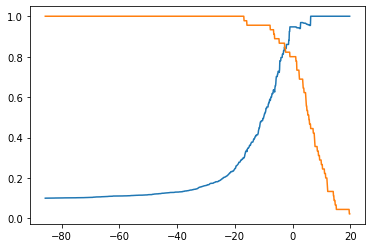

In [8]:
plt.plot(threshoulds,precisions)
plt.plot(threshoulds,recalls)
plt.show()

### Curve of Precision-Recall

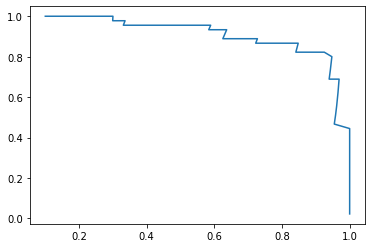

In [9]:
plt.plot(precisions,recalls)
plt.show()

### Curve of Precision-Recall in sciki-learn


In [10]:
from sklearn.metrics import precision_recall_curve

precisions,recalls, threshoulds = precision_recall_curve(y_test, decision_scores)

In [11]:
precisions.shape

(151,)

In [13]:
recalls.shape

(151,)

In [14]:
threshoulds.shape

(150,)

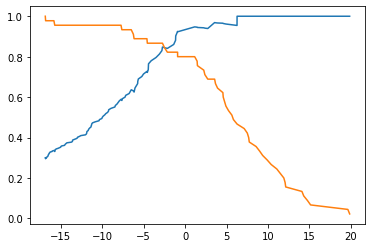

In [15]:
plt.plot(threshoulds,precisions[:-1])
plt.plot(threshoulds,recalls[:-1])
plt.show()

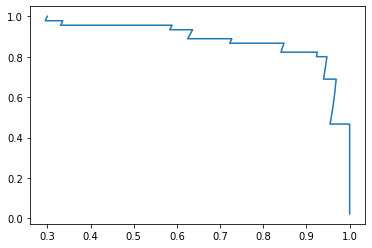

In [16]:
plt.plot(precisions[:-1],recalls[:-1])
plt.show()